<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
from google_play_scraper import app

import pandas as pd

import numpy as np

import seaborn as sns

In [115]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [116]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3fa3eaee-9018-4e9a-8f90-a971e60a6aa2,Smoker Amild,https://play-lh.googleusercontent.com/a-/AD5-W...,Dari 5 star sekarang jadi 4.. Skrg jadi 2..Buk...,2,184,5.26.0,2022-12-20 05:19:25,"Hai, mohon maaf atas kendalanya. Mohon infokan...",2020-08-18 18:58:36
1,aca1c850-7d19-47a9-b5b3-fc4a85911bac,Achenk Chonsleth,https://play-lh.googleusercontent.com/a/AEdFTp...,"Sudah lumayan bagus, minusnya hanya saja jika ...",5,36,5.28.0,2023-01-28 14:38:00,Maaf banget udah buat kakak gak nyaman dan kes...,2021-12-18 12:53:58
2,dee58122-df8c-4901-bcda-43f612f0923e,Bejo Waluyo,https://play-lh.googleusercontent.com/a/AEdFTp...,"Saya langganan belanja di Bukalapak, secara um...",4,2,5.27.2,2023-02-05 05:30:29,None,NaT
3,99ac25bb-686c-4009-8edd-016279b23fbb,Agroprobiotik Jawa Barat,https://play-lh.googleusercontent.com/a-/AD5-W...,Sy kesulitan ingin komplen masalah pembayaran ...,2,121,5.27.2,2022-12-30 03:49:00,None,NaT
4,ce62c010-8e9a-4444-b117-7c0f092b61bf,F Pasaribu,https://play-lh.googleusercontent.com/a-/AD5-W...,Saya sebagai seller di bukalapak. Beberapa Kal...,1,6,5.28.0,2023-02-01 07:23:35,None,NaT


In [117]:
len(df_busu.index) #count the number of data we got

1300

In [118]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,ndra lukman,1,2022-12-14 03:48:03,"Apk tidak berguna, pembelian plsa tidak masuk,..."
1296,Darsono Jr,1,2023-02-02 17:31:04,Pake paylater katanya biaya layanan dikenan sa...
1297,Pengguna Google,1,2018-09-22 07:02:35,Aplikasi tidak berjalan.sudah di re instal tet...
1298,veri as,5,2023-01-30 11:09:38,Proses cepat dan mudah dipahami
1299,Ari Wibowo,1,2022-11-27 01:01:53,Aplikasi gila sih. Paylater dendanya gak kira ...


In [119]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [120]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,ndra lukman,1,2022-12-14 03:48:03,"Apk tidak berguna, pembelian plsa tidak masuk,..."
1296,Darsono Jr,1,2023-02-02 17:31:04,Pake paylater katanya biaya layanan dikenan sa...
1297,Pengguna Google,1,2018-09-22 07:02:35,Aplikasi tidak berjalan.sudah di re instal tet...
1298,veri as,5,2023-01-30 11:09:38,Proses cepat dan mudah dipahami
1299,Ari Wibowo,1,2022-11-27 01:01:53,Aplikasi gila sih. Paylater dendanya gak kira ...


In [121]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [122]:
import nltk

In [123]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [124]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,Smoker Amild,2,2022-12-20 05:19:25,Dari 5 star sekarang jadi 4.. Skrg jadi 2..Buk...
1,Achenk Chonsleth,5,2023-01-28 14:38:00,"Sudah lumayan bagus, minusnya hanya saja jika ..."
2,Bejo Waluyo,4,2023-02-05 05:30:29,"Saya langganan belanja di Bukalapak, secara um..."
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,Sy kesulitan ingin komplen masalah pembayaran ...
4,F Pasaribu,1,2023-02-01 07:23:35,Saya sebagai seller di bukalapak. Beberapa Kal...


In [125]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [126]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [127]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [128]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [129]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [130]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [131]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan..."
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,..."
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca..."
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba..."
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap..."
...,...,...,...,...,...
1295,ndra lukman,1,2022-12-14 03:48:03,apk tidak berguna pembelian plsa tidak masukma...,"[apk, tidak, berguna, pembelian, plsa, tidak, ..."
1296,Darsono Jr,1,2023-02-02 17:31:04,pake paylater katanya biaya layanan dikenan sa...,"[pake, paylater, katanya, biaya, layanan, dike..."
1297,Pengguna Google,1,2018-09-22 07:02:35,aplikasi tidak berjalansudah di re instal teta...,"[aplikasi, tidak, berjalansudah, di, re, insta..."
1298,veri as,5,2023-01-30 11:09:38,proses cepat dan mudah dipahami,"[proses, cepat, dan, mudah, dipahami]"


In [132]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [133]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
188,Herlianto Lakoro,5,2023-02-06 12:52:59,sangat bagus dan puaskarna dengan bukalapak sa...,"[sangat, bagus, dan, puaskarna, dengan, bukala..."
16,Ayu Fitria,2,2023-02-06 11:44:38,aneh masa udah hari gabisa klik terima barang...,"[aneh, masa, udah, hari, gabisa, klik, terima,..."
250,Misbah Parenggean,5,2023-02-06 09:22:45,mantap cepat aman lengkap bersaing good luck,"[mantap, cepat, aman, lengkap, bersaing, good,..."
923,Setangkai Lima,5,2023-02-06 08:35:00,selalu puas respon sangat cepat mantab lah,"[selalu, puas, respon, sangat, cepat, mantab, ..."
10,JFR,1,2023-02-06 06:07:37,gila ya paylater bukalapak saya make pertama b...,"[gila, ya, paylater, bukalapak, saya, make, pe..."


In [134]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [135]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(jadi, 2), (dari, 1), (star, 1), (sekarang, 1...
1    [(sudah, 3), (gambar, 3), (lumayan, 2), (susah...
2    [(saya, 6), (yg, 5), (sama, 3), (barang, 3), (...
3    [(ingin, 3), (komplen, 3), (sy, 2), (pembayara...
4    [(saya, 3), (seller, 2), (dengan, 2), (pengiri...
Name: Ulasan_tokenize, dtype: object


In [136]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [dari, star, sekarang, jadi, skrg, jadi, bukan...
1       [sudah, lumayan, bagus, minusnya, hanya, saja,...
2       [saya, langganan, belanja, di, bukalapak, seca...
3       [sy, kesulitan, ingin, komplen, masalah, pemba...
4       [saya, sebagai, seller, di, bukalapak, beberap...
                              ...                        
1295    [apk, tidak, berguna, pembelian, plsa, tidak, ...
1296    [pake, paylater, katanya, biaya, layanan, dike...
1297    [aplikasi, tidak, berjalansudah, di, re, insta...
1298                [proses, cepat, dan, mudah, dipahami]
1299    [aplikasi, gila, sih, paylater, dendanya, gak,...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [137]:
slank_word_dict = {
    "berjalansudah" : "berjalan",
    "paraah" : "parah",
    "keduakali" : "",
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [138]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [139]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [140]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b..."
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,...","[sudah, lumayan, bagus, minusnya, hanya, saja,..."
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca...","[saya, langganan, belanja, di, bukalapak, seca..."
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem..."
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap..."
...,...,...,...,...,...,...
1295,ndra lukman,1,2022-12-14 03:48:03,apk tidak berguna pembelian plsa tidak masukma...,"[apk, tidak, berguna, pembelian, plsa, tidak, ...","[apk, tidak, berguna, pembelian, pulsa, tidak,..."
1296,Darsono Jr,1,2023-02-02 17:31:04,pake paylater katanya biaya layanan dikenan sa...,"[pake, paylater, katanya, biaya, layanan, dike...","[pakai, paylater, katanya, biaya, layanan, dik..."
1297,Pengguna Google,1,2018-09-22 07:02:35,aplikasi tidak berjalansudah di re instal teta...,"[aplikasi, tidak, berjalansudah, di, re, insta...","[aplikasi, tidak, berjalan, di, re, instal, te..."
1298,veri as,5,2023-01-30 11:09:38,proses cepat dan mudah dipahami,"[proses, cepat, dan, mudah, dipahami]","[proses, cepat, dan, mudah, dipahami]"


In [141]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [dari, star, sekarang, jadi, sekarang, jadi, b...
1       [sudah, lumayan, bagus, minusnya, hanya, saja,...
2       [saya, langganan, belanja, di, bukalapak, seca...
3       [saya, kesulitan, ingin, komplen, masalah, pem...
4       [saya, sebagai, seller, di, bukalapak, beberap...
                              ...                        
1295    [apk, tidak, berguna, pembelian, pulsa, tidak,...
1296    [pakai, paylater, katanya, biaya, layanan, dik...
1297    [aplikasi, tidak, berjalan, di, re, instal, te...
1298                [proses, cepat, dan, mudah, dipahami]
1299    [aplikasi, gila, sih, paylater, dendanya, engg...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [142]:
from nltk.corpus import stopwords

In [143]:
list_stopwords = stopwords.words('indonesian')

In [144]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [145]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber..."
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,...","[sudah, lumayan, bagus, minusnya, hanya, saja,...","[lumayan, bagus, minusnya, edit, gambar, displ..."
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca...","[saya, langganan, belanja, di, bukalapak, seca...","[langganan, belanja, bukalapak, puas, produk, ..."
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,..."
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ..."
...,...,...,...,...,...,...,...
1295,ndra lukman,1,2022-12-14 03:48:03,apk tidak berguna pembelian plsa tidak masukma...,"[apk, tidak, berguna, pembelian, plsa, tidak, ...","[apk, tidak, berguna, pembelian, pulsa, tidak,...","[apk, berguna, pembelian, pulsa, masukmao, kom..."
1296,Darsono Jr,1,2023-02-02 17:31:04,pake paylater katanya biaya layanan dikenan sa...,"[pake, paylater, katanya, biaya, layanan, dike...","[pakai, paylater, katanya, biaya, layanan, dik...","[pakai, paylater, biaya, layanan, dikenan, kal..."
1297,Pengguna Google,1,2018-09-22 07:02:35,aplikasi tidak berjalansudah di re instal teta...,"[aplikasi, tidak, berjalansudah, di, re, insta...","[aplikasi, tidak, berjalan, di, re, instal, te...","[aplikasi, berjalan, re, instal, kebukapas, ta..."
1298,veri as,5,2023-01-30 11:09:38,proses cepat dan mudah dipahami,"[proses, cepat, dan, mudah, dipahami]","[proses, cepat, dan, mudah, dipahami]","[proses, cepat, mudah, dipahami]"


In [146]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4496
------------------------
star : star
bagusmalah : bagusmalah
menurunupdate : menurunupdate
terbaru : baru
berpengaruhhapus : berpengaruhhapus
cacheclear : cacheclear
datasama : datasama
ajaaplikasi : ajaaplikasi
berat : berat
loadingnya : loadingnya
menonton : tonton
streaming : streaming
hd : hd
lancar : lancar
jaya : jaya
lumayan : lumayan
bagus : bagus
minusnya : minus
edit : edit
gambar : gambar
display : display
susah : susah
tampil : tampil
menghilang : hilang
hapus : hapus
memodifikasi : modifikasi
iklan : iklan
menarik : tarik
tersedia : sedia
varian : varian
produk : produk
judul : judul
selainnya : selain
langganan : langgan
belanja : belanja
bukalapak : bukalapak
puas : puas
nya : nya
merk : merk
spesifikasi : spesifikasi
harga : harga
tertampil : tampil
variatif : variatif
selisih : selisih
signifikan : signifikan
memilih : pilih
murah : murah
barang : barang
berbeda : beda
beli : beli
beda : beda
kwalitas : kwalitas
ketimbang : ketimbang
terimakasih : terimakasih
kesu

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [153]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]


In [154]:
name_dataframe.to_excel("tokped_text.xlsx")

In [155]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [156]:
tokenize_ulasan = word_tokenize(ulasan)

In [157]:
tokenize_ulasan

['star',
 'bagusmalah',
 'menurunupdate',
 'baru',
 'berpengaruhhapus',
 'cacheclear',
 'datasama',
 'ajaaplikasi',
 'berat',
 'loadingnya',
 'tonton',
 'streaming',
 'hd',
 'lancar',
 'jaya',
 'lumayan',
 'bagus',
 'minus',
 'edit',
 'gambar',
 'display',
 'susah',
 'gambar',
 'tampil',
 'hilang',
 'hapus',
 'susah',
 'modifikasi',
 'gambar',
 'iklan',
 'tarik',
 'sedia',
 'varian',
 'produk',
 'judul',
 'iklan',
 'selain',
 'lumayan',
 'langgan',
 'belanja',
 'bukalapak',
 'puas',
 'produk',
 'display',
 'nya',
 'merk',
 'spesifikasi',
 'harga',
 'tampil',
 'variatif',
 'selisih',
 'harga',
 'signifikan',
 'spesifikasi',
 'pilih',
 'murah',
 'barang',
 'nya',
 'beda',
 'barang',
 'beli',
 'beda',
 'barang',
 'kwalitas',
 'ketimbang',
 'terimakasih',
 'sulit',
 'komplen',
 'bayar',
 'paylater',
 'no',
 'watelpon',
 'susah',
 'aktif',
 'membingunkan',
 'komplen',
 'komplen',
 'paylater',
 'bayar',
 'masuk',
 'seller',
 'bukalapak',
 'kali',
 'jadi',
 'terima',
 'pesan',
 'kirim',
 'tik

In [159]:
fqdist = FreqDist(tokenize_ulasan)

In [160]:
fqdist

FreqDist({'bukalapak': 569, 'aplikasi': 450, 'nya': 412, 'barang': 375, 'bayar': 281, 'pakai': 253, 'buka': 247, 'beli': 236, 'kirim': 233, 'belanja': 228, ...})

In [161]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 569),
 ('aplikasi', 450),
 ('nya', 412),
 ('barang', 375),
 ('bayar', 281),
 ('pakai', 253),
 ('buka', 247),
 ('beli', 236),
 ('kirim', 233),
 ('belanja', 228),
 ('lapak', 196),
 ('jual', 191),
 ('transaksi', 181),
 ('bantu', 162),
 ('chat', 157)]

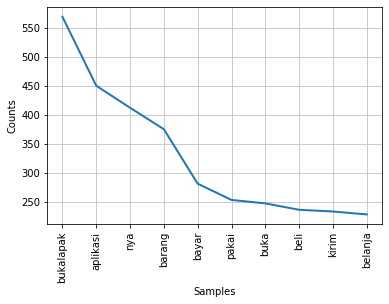

In [162]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [163]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,...","[sudah, lumayan, bagus, minusnya, hanya, saja,...","[lumayan, bagus, minusnya, edit, gambar, displ...","[lumayan, bagus, minus, edit, gambar, display,...",lumayan bagus minus edit gambar display susah ...,1
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca...","[saya, langganan, belanja, di, bukalapak, seca...","[langganan, belanja, bukalapak, puas, produk, ...","[langgan, belanja, bukalapak, puas, produk, di...",langgan belanja bukalapak puas produk display ...,1
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0
...,...,...,...,...,...,...,...,...,...,...
1295,ndra lukman,1,2022-12-14 03:48:03,apk tidak berguna pembelian plsa tidak masukma...,"[apk, tidak, berguna, pembelian, plsa, tidak, ...","[apk, tidak, berguna, pembelian, pulsa, tidak,...","[apk, berguna, pembelian, pulsa, masukmao, kom...","[apk, guna, beli, pulsa, masukmao, komplen]",apk guna beli pulsa masukmao komplen,0
1296,Darsono Jr,1,2023-02-02 17:31:04,pake paylater katanya biaya layanan dikenan sa...,"[pake, paylater, katanya, biaya, layanan, dike...","[pakai, paylater, katanya, biaya, layanan, dik...","[pakai, paylater, biaya, layanan, dikenan, kal...","[pakai, paylater, biaya, layan, ken, kali, aja...",pakai paylater biaya layan ken kali ajaehh dad...,0
1297,Pengguna Google,1,2018-09-22 07:02:35,aplikasi tidak berjalansudah di re instal teta...,"[aplikasi, tidak, berjalansudah, di, re, insta...","[aplikasi, tidak, berjalan, di, re, instal, te...","[aplikasi, berjalan, re, instal, kebukapas, ta...","[aplikasi, jalan, re, instal, kebukapas, tap, ...",aplikasi jalan re instal kebukapas tap beli ba...,0
1298,veri as,5,2023-01-30 11:09:38,proses cepat dan mudah dipahami,"[proses, cepat, dan, mudah, dipahami]","[proses, cepat, dan, mudah, dipahami]","[proses, cepat, mudah, dipahami]","[proses, cepat, mudah, paham]",proses cepat mudah paham,1


In [164]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [166]:
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,...","[sudah, lumayan, bagus, minusnya, hanya, saja,...","[lumayan, bagus, minusnya, edit, gambar, displ...","[lumayan, bagus, minus, edit, gambar, display,...",lumayan bagus minus edit gambar display susah ...,1
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca...","[saya, langganan, belanja, di, bukalapak, seca...","[langganan, belanja, bukalapak, puas, produk, ...","[langgan, belanja, bukalapak, puas, produk, di...",langgan belanja bukalapak puas produk display ...,1
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0


In [167]:
from textblob import TextBlob


In [168]:
def run_vader(name_dataframe):
    # Generate VADER sentiment analyzer object
    sid = SentimentIntensityAnalyzer()

In [170]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0,0.0,0.0,Neutral
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,...","[sudah, lumayan, bagus, minusnya, hanya, saja,...","[lumayan, bagus, minusnya, edit, gambar, displ...","[lumayan, bagus, minus, edit, gambar, display,...",lumayan bagus minus edit gambar display susah ...,1,-0.1,0.1,Negative
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca...","[saya, langganan, belanja, di, bukalapak, seca...","[langganan, belanja, bukalapak, puas, produk, ...","[langgan, belanja, bukalapak, puas, produk, di...",langgan belanja bukalapak puas produk display ...,1,0.0,0.0,Neutral
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.0,0.0,Neutral
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0,0.0,0.0,Neutral


In [171]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment
0,Smoker Amild,2,2022-12-20 05:19:25,dari star sekarang jadi skrg jadi bukan m...,"[dari, star, sekarang, jadi, skrg, jadi, bukan...","[dari, star, sekarang, jadi, sekarang, jadi, b...","[star, bagusmalah, menurunupdate, terbaru, ber...","[star, bagusmalah, menurunupdate, baru, berpen...",star bagusmalah menurunupdate baru berpengaruh...,0,0.0,0.0,Neutral
1,Achenk Chonsleth,5,2023-01-28 14:38:00,sudah lumayan bagus minusnya hanya saja jika e...,"[sudah, lumayan, bagus, minusnya, hanya, saja,...","[sudah, lumayan, bagus, minusnya, hanya, saja,...","[lumayan, bagus, minusnya, edit, gambar, displ...","[lumayan, bagus, minus, edit, gambar, display,...",lumayan bagus minus edit gambar display susah ...,1,-0.1,0.1,Negative
2,Bejo Waluyo,4,2023-02-05 05:30:29,saya langganan belanja di bukalapak secara umu...,"[saya, langganan, belanja, di, bukalapak, seca...","[saya, langganan, belanja, di, bukalapak, seca...","[langganan, belanja, bukalapak, puas, produk, ...","[langgan, belanja, bukalapak, puas, produk, di...",langgan belanja bukalapak puas produk display ...,1,0.0,0.0,Neutral
3,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.0,0.0,Neutral
4,F Pasaribu,1,2023-02-01 07:23:35,saya sebagai seller di bukalapak beberapa kali...,"[saya, sebagai, seller, di, bukalapak, beberap...","[saya, sebagai, seller, di, bukalapak, beberap...","[seller, bukalapak, kali, kejadian, menerima, ...","[seller, bukalapak, kali, jadi, terima, pesan,...",seller bukalapak kali jadi terima pesan kirim ...,0,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,ndra lukman,1,2022-12-14 03:48:03,apk tidak berguna pembelian plsa tidak masukma...,"[apk, tidak, berguna, pembelian, plsa, tidak, ...","[apk, tidak, berguna, pembelian, pulsa, tidak,...","[apk, berguna, pembelian, pulsa, masukmao, kom...","[apk, guna, beli, pulsa, masukmao, komplen]",apk guna beli pulsa masukmao komplen,0,0.0,0.0,Neutral
1296,Darsono Jr,1,2023-02-02 17:31:04,pake paylater katanya biaya layanan dikenan sa...,"[pake, paylater, katanya, biaya, layanan, dike...","[pakai, paylater, katanya, biaya, layanan, dik...","[pakai, paylater, biaya, layanan, dikenan, kal...","[pakai, paylater, biaya, layan, ken, kali, aja...",pakai paylater biaya layan ken kali ajaehh dad...,0,0.0,0.0,Neutral
1297,Pengguna Google,1,2018-09-22 07:02:35,aplikasi tidak berjalansudah di re instal teta...,"[aplikasi, tidak, berjalansudah, di, re, insta...","[aplikasi, tidak, berjalan, di, re, instal, te...","[aplikasi, berjalan, re, instal, kebukapas, ta...","[aplikasi, jalan, re, instal, kebukapas, tap, ...",aplikasi jalan re instal kebukapas tap beli ba...,0,0.0,0.0,Neutral
1298,veri as,5,2023-01-30 11:09:38,proses cepat dan mudah dipahami,"[proses, cepat, dan, mudah, dipahami]","[proses, cepat, dan, mudah, dipahami]","[proses, cepat, mudah, dipahami]","[proses, cepat, mudah, paham]",proses cepat mudah paham,1,0.0,0.0,Neutral


In [172]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

Positive words


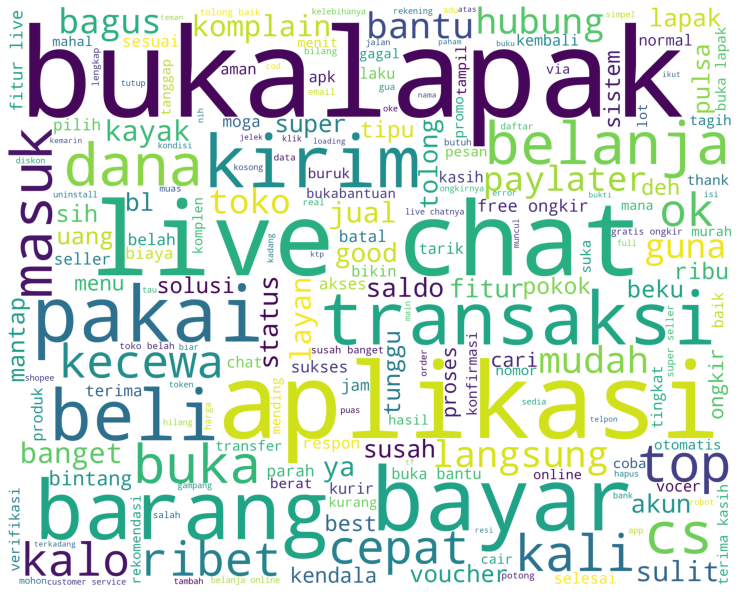

Negative words


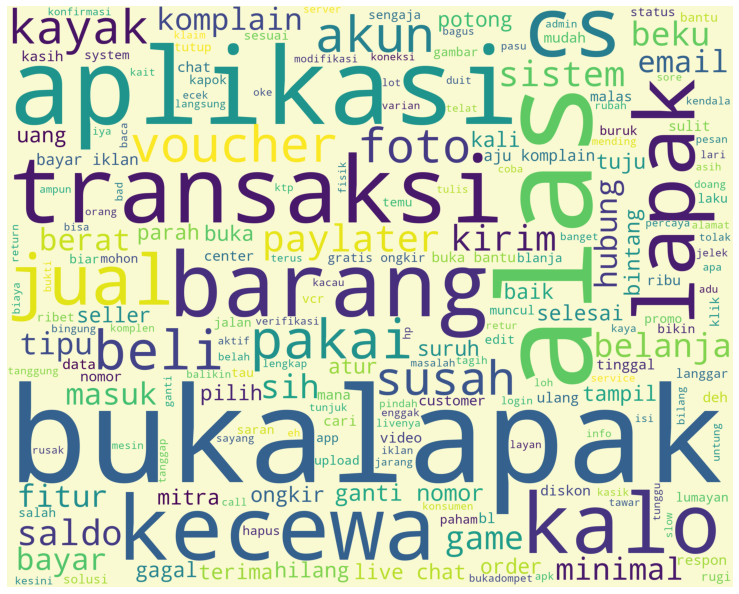

Neutral words


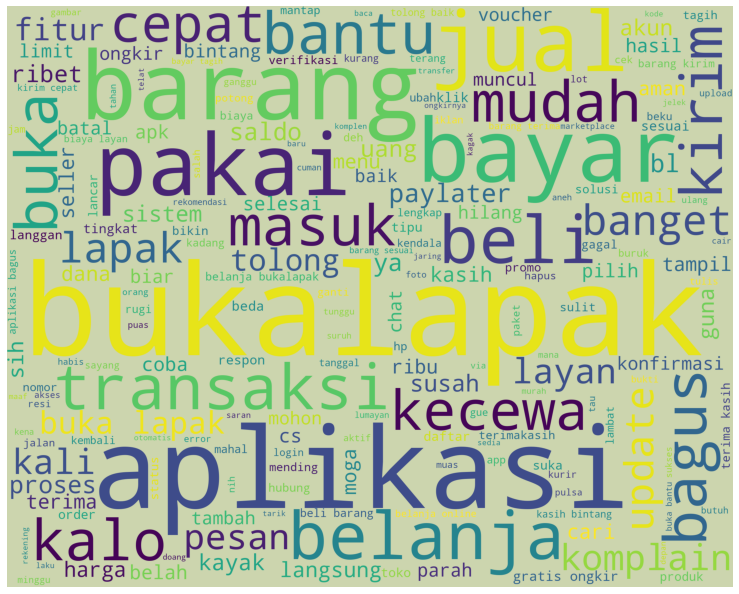

In [234]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']
train_net = name_dataframe[ name_dataframe['Sentiment'] == 'Neutral']
train_net = train_net['Ulasan_clean']

def wordcloud_draw(data, color = '#FAFAD2'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not word.startswith('nya')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_net,'#ccd5ae')

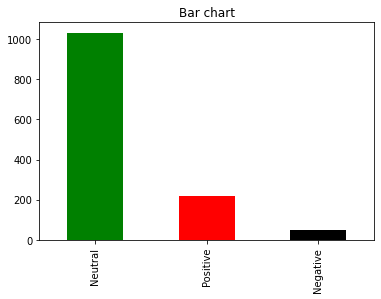

In [174]:
sentimen_data=pd.value_counts(name_dataframe["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red", "black"])
plt.title('Bar chart')
plt.show()

In [175]:
name_dataframe["Sentiment"].value_counts()

Neutral     1031
Positive     219
Negative      50
Name: Sentiment, dtype: int64

In [176]:
name_dataframe["Sentiment"].value_counts()

Neutral     1031
Positive     219
Negative      50
Name: Sentiment, dtype: int64

In [177]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [178]:
Ulasan = name_dataframe['Ulasan_clean']

In [179]:
Ulasan.isnull().sum()

0

In [180]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3591


In [181]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'star': 3109,
 'bagusmalah': 246,
 'menurunupdate': 2005,
 'baru': 311,
 'berpengaruhhapus': 424,
 'cacheclear': 624,
 'datasama': 778,
 'ajaaplikasi': 49,
 'berat': 389,
 'loadingnya': 1832,
 'tonton': 3351,
 'streaming': 3121,
 'hd': 1229,
 'lancar': 1737,
 'jaya': 1384,
 'lumayan': 1856,
 'bagus': 239,
 'minus': 2035,
 'edit': 965,
 'gambar': 1097,
 'display': 897,
 'susah': 3146,
 'tampil': 3181,
 'hilang': 1243,
 'hapus': 1212,
 'modifikasi': 2056,
 'iklan': 1273,
 'tarik': 3201,
 'sedia': 2893,
 'varian': 3496,
 'produk': 2608,
 'judul': 1424,
 'selain': 2915,
 'langgan': 1744,
 'belanja': 355,
 'bukalapak': 549,
 'puas': 2637,
 'nya': 2223,
 'merk': 2013,
 'spesifikasi': 3100,
 'harga': 1215,
 'variatif': 3498,
 'selisih': 2929,
 'signifikan': 3033,
 'pilih': 2531,
 'murah': 2089,
 'barang': 295,
 'beda': 340,
 'beli': 360,
 'kwalitas': 1688,
 'ketimbang': 1571,
 'terimakasih': 3259,
 'sulit': 3132,
 'komplen': 1613,
 'bayar': 328,
 'paylater': 2401,
 'no': 2187,
 'watelpon': 3

In [182]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 49)	1
  (0, 246)	1
  (0, 311)	1
  (0, 389)	1
  (0, 424)	1
  (0, 624)	1
  (0, 778)	1
  (0, 1229)	1
  (0, 1384)	1
  (0, 1737)	1
  (0, 1832)	1
  (0, 2005)	1
  (0, 3109)	1
  (0, 3121)	1
  (0, 3351)	1
  (1, 239)	1
  (1, 897)	1
  (1, 965)	1
  (1, 1097)	3
  (1, 1212)	1
  (1, 1243)	1
  (1, 1273)	2
  (1, 1424)	1
  (1, 1856)	2
  (1, 2035)	1
  :	:
  (1299, 179)	1
  (1299, 221)	1
  (1299, 441)	1
  (1299, 602)	1
  (1299, 652)	1
  (1299, 799)	2
  (1299, 916)	1
  (1299, 1133)	1
  (1299, 1366)	1
  (1299, 1459)	1
  (1299, 1493)	1
  (1299, 1656)	1
  (1299, 1779)	1
  (1299, 1982)	1
  (1299, 2352)	4
  (1299, 2401)	5
  (1299, 2763)	2
  (1299, 2845)	1
  (1299, 3000)	1
  (1299, 3015)	1
  (1299, 3035)	1
  (1299, 3179)	2
  (1299, 3217)	1
  (1299, 3365)	1
  (1299, 3421)	1


In [183]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

lumayan bagus minus edit gambar display susah gambar tampil hilang hapus susah modifikasi gambar iklan tarik sedia varian produk judul iklan selain lumayan


In [184]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 239)	1
  (0, 897)	1
  (0, 965)	1
  (0, 1097)	3
  (0, 1212)	1
  (0, 1243)	1
  (0, 1273)	2
  (0, 1424)	1
  (0, 1856)	2
  (0, 2035)	1
  (0, 2056)	1
  (0, 2608)	1
  (0, 2893)	1
  (0, 2915)	1
  (0, 3146)	2
  (0, 3181)	1
  (0, 3201)	1
  (0, 3496)	1


In [185]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.78459412 6.78459412 7.07227619 ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3496)	0.18397773884794302
  (0, 3201)	0.16047142576246856
  (0, 3181)	0.1390821711751681
  (0, 3146)	0.23762808288686685
  (0, 2915)	0.23830582969082365
  (0, 2893)	0.16337057728696716
  (0, 2608)	0.14447041255806153
  (0, 2056)	0.22538418729262355
  (0, 2035)	0.22538418729262355
  (0, 1856)	0.32377609053082856
  (0, 1424)	0.22538418729262355
  (0, 1273)	0.31823021309007454
  (0, 1243)	0.14128088370443842
  (0, 1212)	0.15420252610263852
  (0, 1097)	0.5103141647404801
  (0, 965)	0.1903728513118947
  (0, 897)	0.22538418729262355
  (0, 239)	0.10268502158213426


In [186]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "Sentiment"]]

In [187]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-187-5732072d6cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [188]:
data_label.to_excel("data_label.xlsx")

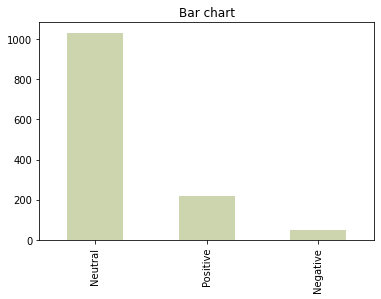

In [189]:
sentimen_data=pd.value_counts(data_label["Sentiment"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["#ccd5ae"])
plt.title('Bar chart')
plt.show()

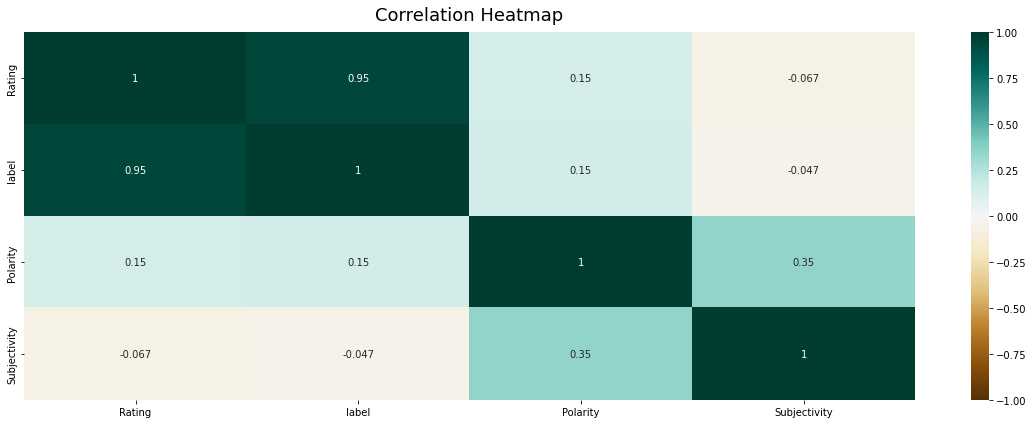

In [190]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(name_dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

In [191]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label', 'Polarity', 'Subjectivity', 'Sentiment'],
      dtype='object')

In [192]:
from wordcloud import WordCloud

In [193]:
train_s0 = data_label[data_label["Sentiment"] == 'Negative']

In [194]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-194-4a391e85ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [195]:
train_s0

,Nama pengguna,Ulasan_clean,Sentiment
1,Achenk Chonsleth,lumayan bagus minus edit gambar display susah ...,Negative
6,david james,order alamat kirim laku lapak bilang kode book...,Negative
9,Nyon bae,aplikasi guna ganti nomor hp kirim foto ktp ga...,Negative
17,Trade Day,kecewa sihketika voucher voucher alas voucher ...,Negative
28,tri mulyanto,kecewa kali belanja lapak merespon pesan batas...,Negative
44,Cucu Latipah,sengaja bintang biar baca isi saldo atm tangga...,Negative
45,ari hariyanto,parah bukalapak komplen klaim barang sulit pot...,Negative
46,Annisa Arifah,kecewa sellernya fiturnya live chat susah tamb...,Negative
68,WesLi,susah hubungin cs sulit hubung cs pakai email ...,Negative
73,Bam Hendrian,kesini sistem nya berat ajabanyak sisrem gunab...,Negative


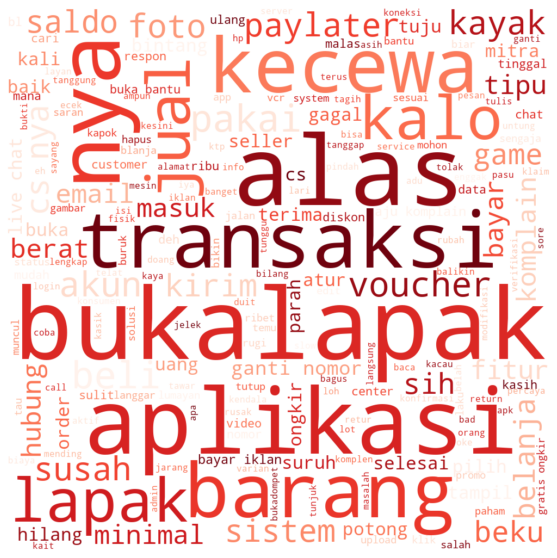

In [196]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

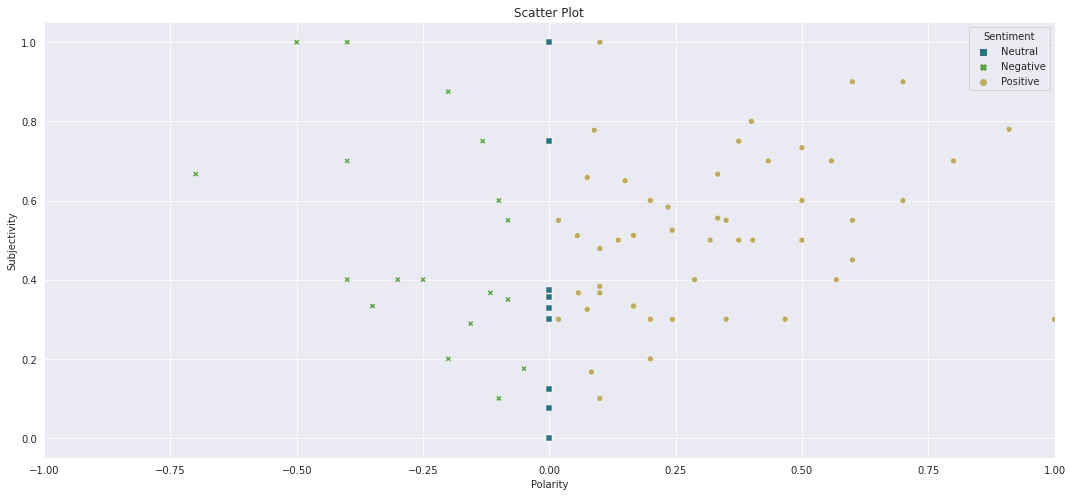

In [197]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=name_dataframe, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

In [198]:
train_s1 = data_label[data_label["Sentiment"] == 'Positive']

In [199]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

<ipython-input-199-89653e0cae75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [200]:
train_s1

,Nama pengguna,Ulasan_clean,Sentiment
5,Ryan Apriandi,aplikasi parah belanja cc pilih klik cicil tag...,Positive
8,adi kusnadi,app jelek akun tibatiba blokir beku garagara i...,Positive
10,JFR,gila ya paylater bukalapak pakai beli pulsa ri...,Positive
13,CKN Official,tf uang virtual account nominal ribu notifikas...,Positive
20,Mohammad Firmansyah,menu live chat sulit terkadang kendala selesai...,Positive
...,...,...,...
1256,Alik Badrun,thank bukalapak kirim jos gandositungan detik ...,Positive
1270,Ade Sutami,proses kirim cepat service lapak ok good job thx,Positive
1274,ADE HERDIYANA,asli gua sesal sedia fitur batal pesan kayak a...,Positive
1276,albert kurnia,aplikasi tipu beli voucher google play bayar v...,Positive


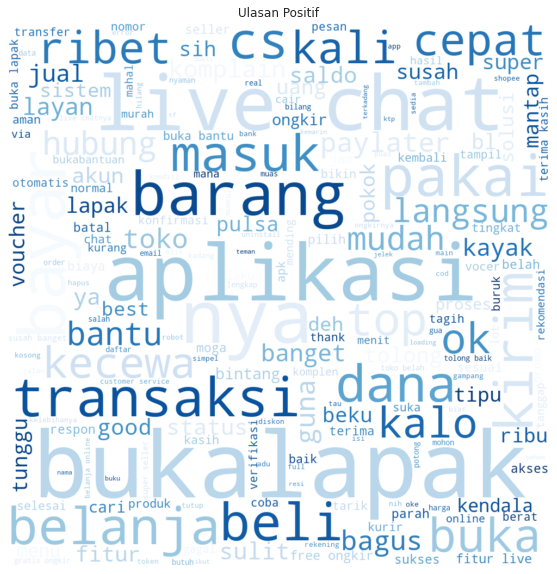

In [201]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [202]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

<ipython-input-202-27b828896519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['Sentiment'], 
                                                    test_size=0.1, stratify=data_label['Sentiment'], random_state=30)

In [204]:
import numpy as np

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [206]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3295)
(130, 3295)


In [207]:
X_train = X_train.toarray()

In [208]:
print(*X_train, sep = "\n")

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.33881799 ... 0.         0.         0.        ]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0.

In [209]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [210]:
X_test = X_test.toarray()

In [211]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [212]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0005336699231206307}

In [213]:
nb = GaussianNB(var_smoothing=1.0)

In [214]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [215]:
y_pred_nb = nb.predict(X_test)

In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [217]:
print(y_train)

244      Neutral
1222     Neutral
904      Neutral
150      Neutral
1145     Neutral
          ...   
1061    Negative
622      Neutral
494      Neutral
467      Neutral
628      Neutral
Name: Sentiment, Length: 1170, dtype: object


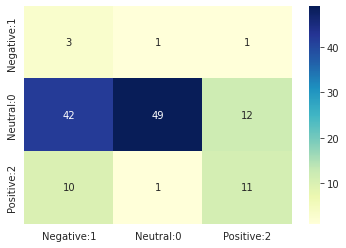

In [221]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Neutral:0', 'Positive:2'], 
                                 index=['Negative:1', 'Neutral:0', 'Positive:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [222]:
cm = confusion_matrix(y_test, y_pred_nb)

In [223]:

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 3  1  1]
 [42 49 12]
 [10  1 11]]


In [224]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 3  1  1]
 [42 49 12]
 [10  1 11]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

    Negative       0.05      0.60      0.10         5
     Neutral       0.96      0.48      0.64       103
    Positive       0.46      0.50      0.48        22

    accuracy                           0.48       130
   macro avg       0.49      0.53      0.40       130
weighted avg       0.84      0.48      0.59       130



In [225]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [227]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [228]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [229]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [230]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.83      1.00      0.91       103
    Positive       1.00      0.27      0.43        22

    accuracy                           0.84       130
   macro avg       0.61      0.42      0.45       130
weighted avg       0.83      0.84      0.79       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.83      1.00      0.91       103
    Positive       1.00      0.27      0.43        22

    accuracy                           0.84       130
   macro avg       0.61      0.42      0.45       130
weighted avg       0.83      0.84      0.79       130



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat